## Forward and Backward Key Schedule

In [2]:
SBOX = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

INV_SBOX = [
	0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
	0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
	0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
	0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
	0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
	0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
	0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
	0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
	0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
	0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
	0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
	0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
	0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
	0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
	0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
	0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D
]

RCON = (
    0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
    0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D, 0x9A,
    0x2F, 0x5E, 0xBC, 0x63, 0xC6, 0x97, 0x35, 0x6A,
    0xD4, 0xB3, 0x7D, 0xFA, 0xEF, 0xC5, 0x91, 0x39,
)


def forward_key_schedule(key, n_rounds):
    round_keys = list(key)
    for i in range(4, 4*(n_rounds+1)):
        a0, a1, a2, a3 = round_keys[(i-1)*4 : i*4]
        if i % 4 == 0:
            a0, a1, a2, a3 = SBOX[a1], SBOX[a2], SBOX[a3], SBOX[a0]
            a0 = a0 ^ RCON[i//4]
        b0, b1, b2, b3 = round_keys[(i-4)*4 : (i-3)*4]
        round_keys.extend([a0^b0, a1^b1, a2^b2, a3^b3])
    return round_keys

def backward_key_schedule(last_round_key, n_rounds):
    round_keys = list(last_round_key)
    for i in range(n_rounds, 0, -1):
        b12 = round_keys[12] ^ round_keys[8]
        b13 = round_keys[13] ^ round_keys[9]
        b14 = round_keys[14] ^ round_keys[10]
        b15 = round_keys[15] ^ round_keys[11]

        b8  = round_keys[8 ] ^ round_keys[4]
        b9  = round_keys[9 ] ^ round_keys[5]
        b10 = round_keys[10] ^ round_keys[6]
        b11 = round_keys[11] ^ round_keys[7]

        b4 = round_keys[4] ^ round_keys[0]
        b5 = round_keys[5] ^ round_keys[1]
        b6 = round_keys[6] ^ round_keys[2]
        b7 = round_keys[7] ^ round_keys[3]

        a0, a1, a2, a3 = SBOX[b13], SBOX[b14], SBOX[b15], SBOX[b12]
        a0 = a0 ^ RCON[i]

        b0 = a0 ^ round_keys[0]
        b1 = a1 ^ round_keys[1]
        b2 = a2 ^ round_keys[2]
        b3 = a3 ^ round_keys[3]
        
        round_keys = [b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15] + round_keys
    return round_keys

## Test the target key

In [3]:
# Example key in from https://nvlpubs.nist.gov/nistpubs/fips/nist.fips.197.pdf (Appendix A1)
key = bytes.fromhex("2b7e151628aed2a6abf7158809cf4f3c")
# round_key_10 = bytes.fromhex("D014F9A8C9EE2589E13F0CC8B6630CA6")
# plaintexts and ciphertexts
plts = open("demo_input.txt", "r").readlines()
cpts = open("demo_output.txt", "r").readlines()
assert len(plts) == len(cpts)
plts = [bytes.fromhex(m) for m in plts]
cpts = [bytes.fromhex(m) for m in cpts]

from Crypto.Cipher import AES

aes128 = AES.new(key, AES.MODE_ECB)
for (m, c) in zip(plts, cpts):
    c1 = aes128.encrypt(m)
    assert c == c1

## Load Traces

In [4]:
from os import listdir, path

TRACE_LEN = 29000
N_TRACES = 2000
TRACE_FOLDER = "traces"

traces = []
# Note that the order of the traces must correspond to
# the order of the pairs of plaintexts and ciphertexts.
# Thus we sort the file names of the traces.
for file in sorted(list(listdir(TRACE_FOLDER))):
    if file == ".DS_Store":
        continue
    path_to_file = path.join(TRACE_FOLDER, file)
    data = open(path_to_file, "r").readlines()
    data = [float(v) for v in data]
    assert len(data) == TRACE_LEN
    traces.append(data)

assert len(traces) == N_TRACES

## Verification of correct key recovery

In [54]:
def verify_key(round_key_10):
    round_keys = backward_key_schedule(round_key_10, n_rounds=10)
    key = bytes(round_keys[:16])
    plt_ref = plts[0]
    cpt_ref = cpts[0]
    aes128 = AES.new(key, AES.MODE_ECB)
    cpt = aes128.encrypt(plt_ref)
    return cpt == cpt_ref

## DPA attack on last round

In [65]:
import numpy as np


traces = np.array(traces)

# Each target bit posion in a byte
for l in range(8):
    print(f"Target bit at position {l}: ")
    print(f"    Recovered round-10 key: ", end="")
    recovered_round_key_10 = []
    # Mean delta accumulation of traces
    # This is just for visualization
    mean_delta_accu_visualization = []
    # Each byte of key
    for j in range(16):
        delta = []
        mean_delta_accu_visualization.append([])
        for byte_guess in range(256):
            count0 = 0
            count1 = 0
            # differential accummulations of traces
            accu0 = np.array([0.0]*TRACE_LEN)
            accu1 = np.array([0.0]*TRACE_LEN)

            # Each of 2000 cpts
            for (i, cpt) in enumerate(cpts):
                v = INV_SBOX[cpt[j] ^ byte_guess]
                target_bit = (v >> l) & 1
                if target_bit == 0:
                    accu0 += traces[i]
                    count0 += 1
                else:
                    accu1 += traces[i]
                    count1 += 1
            
            mean_delta_accu = np.abs(accu1/count1 - accu0/count0)
            delta.append(np.max(mean_delta_accu))
            mean_delta_accu_visualization[j].append(mean_delta_accu)

        assert len(delta) == 256
        delta = np.array(delta)
        predicted_byte = delta.argmax()
        print(f"{predicted_byte:02X} ", end="")
        recovered_round_key_10.append(predicted_byte)

    if verify_key(bytes(recovered_round_key_10)):
        print("---> Correct")
        break
    else:
        print("---> False")            


Target bit at position 0: 
    Recovered round-10 key: D0 14 F9 54 C9 EE 25 89 E1 3F 0C C8 B6 63 0C E1 ---> False
Target bit at position 1: 
    Recovered round-10 key: D0 14 F9 A8 C9 EE 25 89 E1 3F 0C C8 B6 63 0C A6 ---> Correct


In [74]:
round_keys = backward_key_schedule(recovered_round_key_10, n_rounds=10)
print(bytes(round_keys[:16]).hex())

2b7e151628aed2a6abf7158809cf4f3c


### Visualize the difference of the mean power trace

For the correct first key byte:

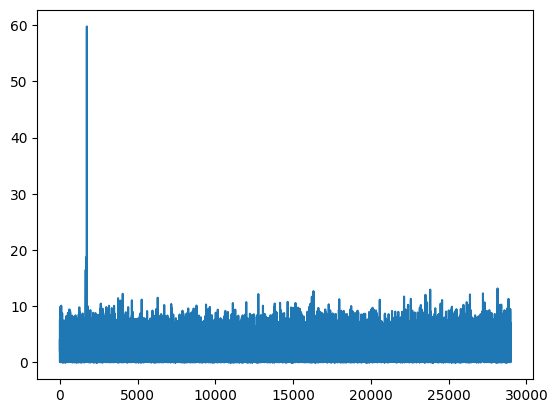

In [70]:
import matplotlib.pyplot as plotter

plotter.plot(mean_delta_accu_visualization[0][0xd0])

For a wrong first key byte:

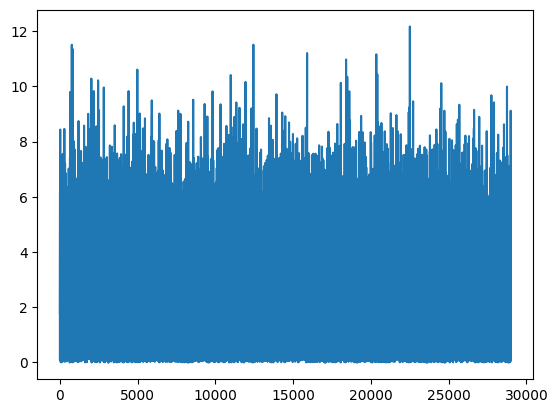

In [71]:
plotter.plot(mean_delta_accu_visualization[0][0x10])

## CPA attack on last round

- $N$: number of traces, $N = 2000$
- $h$: hypothetical power consumption
- $t$: measured power consumption (trace value)


$$
cor = \frac{\sum_{i=1}^N (h_i - \bar{h})(t_i - \bar{t})}{\sqrt{\sum_{i=1}^N (h_i - \bar{h})^2 \cdot \sum_{i=1}^N (t_i - \bar{t})^2}}
$$

In [83]:
# Hamming Weight look-up table
HW = [
	0,1,1,2,1,2,2,3,1,2,2,3,2,3,3,4,
	1,2,2,3,2,3,3,4,2,3,3,4,3,4,4,5,
	1,2,2,3,2,3,3,4,2,3,3,4,3,4,4,5,
	2,3,3,4,3,4,4,5,3,4,4,5,4,5,5,6,
	1,2,2,3,2,3,3,4,2,3,3,4,3,4,4,5,
	2,3,3,4,3,4,4,5,3,4,4,5,4,5,5,6,
	2,3,3,4,3,4,4,5,3,4,4,5,4,5,5,6,
	3,4,4,5,4,5,5,6,4,5,5,6,5,6,6,7,
	1,2,2,3,2,3,3,4,2,3,3,4,3,4,4,5,
	2,3,3,4,3,4,4,5,3,4,4,5,4,5,5,6,
	2,3,3,4,3,4,4,5,3,4,4,5,4,5,5,6,
	3,4,4,5,4,5,5,6,4,5,5,6,5,6,6,7,
	2,3,3,4,3,4,4,5,3,4,4,5,4,5,5,6,
	3,4,4,5,4,5,5,6,4,5,5,6,5,6,6,7,
	3,4,4,5,4,5,5,6,4,5,5,6,5,6,6,7,
	4,5,5,6,5,6,6,7,5,6,6,7,6,7,7,8
]

traces = np.array(traces)
t_mean = np.mean(traces, axis=0)

# Const to compute the hypothetical power consumption
for const in range(256):
    print(f"Const {const}: ")
    print(f"    Recovered round-10 key: ", end="")
    recovered_round_key_10 = []
    correlation_on_trace_visualization = []
    # Each byte of the last round key
    for j in range(16):
        correlation_on_trace_visualization.append([])
        correlation_on_guess = np.zeros(256)
        # Each guess of the j-th byte of key
        for key_guess in range(256):
            # hypothetical power consumption
            h = np.zeros(N_TRACES)
            A = np.zeros(TRACE_LEN)
            B1 = np.zeros(TRACE_LEN)
            B2 = np.zeros(TRACE_LEN)

            for i in range(N_TRACES):
                v = INV_SBOX[cpts[i][j] ^ key_guess]
                h[i] = HW[v ^ const]
            h_mean = np.mean(h)

            # Each of 2000 traces
            for i in range(N_TRACES):
                # h - h_bar
                h_diff = h[i] - h_mean
                # t - t_bar
                t_diff = traces[i] - t_mean
                # (h - h_bar)(t - t_bar)
                A += h_diff * t_diff
                # (h - h_bar)^2
                B1 += h_diff ** 2
                # (t - t_bar)^2
                B2 += t_diff ** 2

            correlation_on_trace = A / np.sqrt(B1 * B2)
            correlation_on_guess[key_guess] = np.max(np.abs(correlation_on_trace))
            correlation_on_trace_visualization[j].append(correlation_on_trace)
        
        predicted_byte = np.argmax(correlation_on_guess)
        print(f"{predicted_byte:02X} ", end="")
        recovered_round_key_10.append(np.argmax(correlation_on_guess))
            
    if verify_key(bytes(recovered_round_key_10)):
        print(f"---> Correct")
        break
    else:
        print(f"---> False")





Const 0: 
    Recovered round-10 key: D0 14 F9 A8 C9 EE 25 89 E1 3F 0C D1 B6 63 0C A6 ---> False
Const 1: 
    Recovered round-10 key: 5C 14 80 65 68 EE 8F F0 E1 3F F1 C8 73 63 79 A6 ---> False
Const 2: 
    Recovered round-10 key: D0 14 F9 A8 C9 EE 25 89 E1 3F 0C C8 B6 63 0C A6 ---> Correct


### Visulize the correlations

For the correct guess:

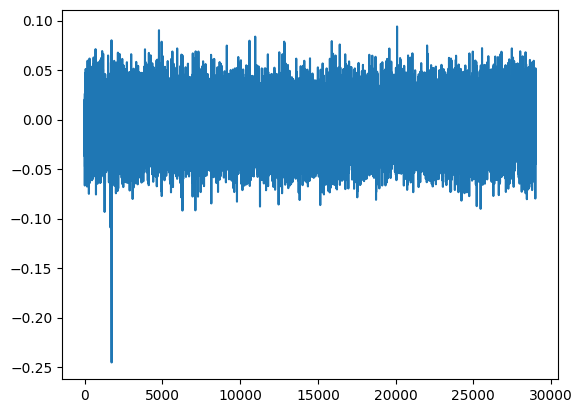

In [84]:
plotter.plot(correlation_on_trace_visualization[0][0xD0])

For the wrong guess:

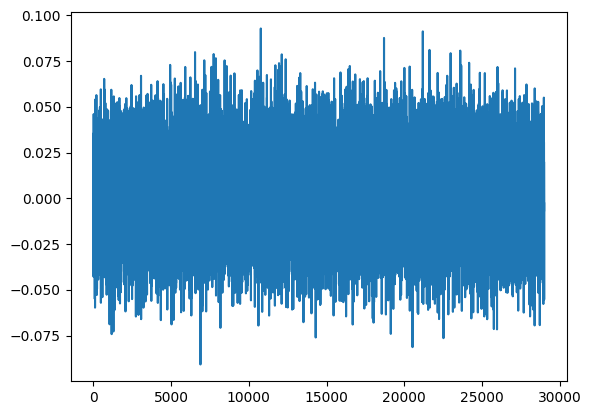

In [85]:
plotter.plot(correlation_on_trace_visualization[0][0x10])